In [1]:
from param_analysis import ParameterAnalysis
from plots import *
import numpy as np
import matplotlib.pyplot as plt
import metrics as cm

In [2]:

""" Configuration for hypothesis 1"""
connectedness_values = np.linspace(0.2,0.8,15)
ecb_precision_gammas = np.linspace(3.5,9,15)
#ecb_precision_gammas = np.append(ecb_precision_gammas, False)
num_agent_values = [12]

n = len(num_agent_values)
c = len(connectedness_values)
env_precision_gammas = [9]
b_precision_gammas = [6]
#b_precision_gammas = np.linspace(0.05,0.8,15)
lr = [0.0]
variances = [0.1]
r_len = len(ecb_precision_gammas)
e_len = len(env_precision_gammas)
b_len = len(b_precision_gammas)
v_len = len(variances)
lr_len = len(lr)
n_trials = 50

RESULTS_FILE = "data/ecb_c"
""" Configuration for hypothesis 2"""

connectedness_values = [0.3]
#connectedness_values = np.linspace(0.2,0.8,15)
ecb_precision_gammas = np.linspace(3.5,9,15)
#ecb_precision_gammas = np.append(ecb_precision_gammas, False)
num_agent_values = [12]

n = len(num_agent_values)
c = len(connectedness_values)
env_precision_gammas = [9]
#b_precision_gammas = [6]
b_precision_gammas = np.linspace(0.05,0.8,15)
lr = [0.0]
variances = [0.1]
r_len = len(ecb_precision_gammas)
e_len = len(env_precision_gammas)
b_len = len(b_precision_gammas)
v_len = len(variances)
lr_len = len(lr)
n_trials = 50

RESULTS_FILE = "data/ecb_b"

In [ ]:

params = ParameterAnalysis('','', num_agent_values, connectedness_values, ecb_precision_gammas, env_precision_gammas, b_precision_gammas, lr, variances, n_trials)
data = params.load_results(RESULTS_FILE)
all_parameters = np.array(list(params.get_param_combinations()))

In [ ]:
""" This is equivalent to running params.get_overall_metrics()  except includes resampling rate"""

polarisation_index = np.zeros(len(all_parameters))
avg_belief_extremity = np.zeros(len(all_parameters))
sampling_ratios = np.zeros(len(all_parameters))
avgs = np.zeros(len(all_parameters))
stds_sampling = np.zeros(len(all_parameters))

for i, combo in enumerate(all_parameters):
    print(i)
    params.update_params(combo) #update the parameters to be the current combination
    params.get_sim_results_from_files() #load the results from the file
    avgs[i] = np.mean([np.absolute(np.mean(params.all_qs[j,:,1,:],axis=0) - 0.5) for j in range(params.n_trials)])
    polarisation_index[i] = np.mean(np.array([cm.average_belief_difference(params.all_qs[j,:,:,:]) for j in range(params.n_trials)]))
    stds_sampling[i] = np.std(np.array([cm.resampling_rate(params.all_neighbour_samplings[i,:,:]) for i in range(params.n_trials)]))
    sampling_ratios[i] = np.mean([cm.resampling_rate(params.all_neighbour_samplings[i,:,:]) for i in range(params.n_trials)]) 


In [ ]:
%config InlineBackend.figure_format = 'svg'
""" Scatter plot of current configuration of beliefs"""
for i in range(50):
    plt.scatter(range(100), params.all_qs[i,:,0,0])

In [9]:
all_parameters = np.array(list(params.get_param_combinations()))


In [25]:
params.update_params(all_parameters[10])

In [ ]:
%config InlineBackend.figure_format = 'svg'
p = [15. ,  0.7,  3.8,  7. ,  9. ,  0.1,  0.3]
params.update_params(p)
params.get_sim_results_from_files()
plt.figure(figsize = (6,6))

for i in range(50):
    for j in range(10):
        plt.scatter(range(100), params.all_qs[i,:,0,j], c = (params.all_qs[i,:,0,j] *100 / 255).round(2), cmap = 'winter', alpha = 0.5, s = 4)
plt.ylabel("Posterior beliefs about the idea")
plt.xlabel("Time")
plt.title(str(p))
plt.show()

In [16]:

def get_2d_histogram(param1, param2, conditional_parameters, conditional_metric, param1_index, param2_index):
    hist = np.zeros((len(param1), len(param2)))
    for i, e in enumerate(param1):
        indices = np.where(conditional_parameters[:,param1_index] == e)[0]
        _params = conditional_parameters[indices]
        metrics = conditional_metric[indices]
        for j, l in enumerate(param2):
            p2_indices = np.where(_params[:,param2_index]==l)[0]
            p2_params = _params[p2_indices]
            p2_metrics = metrics[p2_indices]
            avg_metric = np.nanmean(p2_metrics[np.isfinite(p2_metrics)])
            hist[i,j] = avg_metric
    return hist

In [81]:

def plot_2d_histogram(hist, x_label, y_label, param1, param2):
    fig = plt.figure(figsize = (12,12))
    im2 = plt.imshow(hist)
    #im2 = plt.contourf(hist)
    plt.xlabel(x_label, fontsize = 18)
    plt.ylabel(y_label,fontsize = 18)
    plt.xticks(np.arange(0,len(param2),1), labels = param1.round(2),fontsize = 18)
    plt.yticks(np.arange(0,len(param1),1), labels = param2.round(2),fontsize = 18)
    plt.colorbar()
    plt.savefig("Figure 4b")
    plt.title("Resampling Rate", fontsize=25)
    return im2

In [101]:
ecb_b_db_clustering_hist_std = get_2d_histogram(ecb_precision_gammas, b_precision_gammas, all_parameters, stds_sampling, 2, 3)


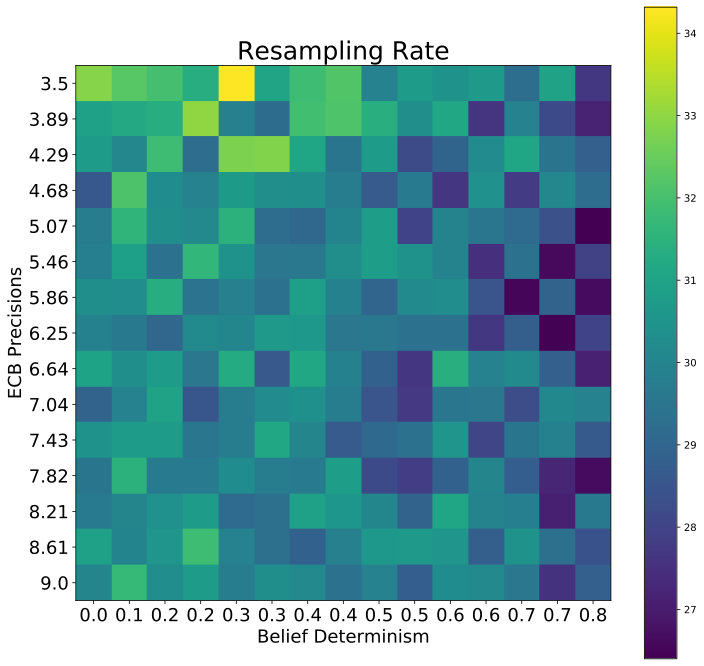

In [99]:
%config InlineBackend.figure_format = 'svg'
ecb_b_db_clustering_hist = get_2d_histogram(ecb_precision_gammas, b_precision_gammas, all_parameters, sampling_ratios, 2, 3)

plot_2d_histogram(ecb_b_db_clustering_hist, "Belief Determinism", "ECB Precisions", b_precision_gammas.round(1), ecb_precision_gammas)



In [32]:
plt.savefig("Figure 3b")

<Figure size 432x288 with 0 Axes>

In [74]:
np.flip(ecb_b_db_clustering_hist[0,:])

array([0.00093136, 0.00122493, 0.00158886, 0.00077571, 0.06993813,
       0.001258  , 0.02248819, 0.21144361, 0.00138757, 0.01801452,
       0.03415629, 0.08482595, 0.09142828, 0.21576032, 0.60750287])

In [28]:
np.sqrt(ecb_b_db_clustering_hist_std[0,:])

array([0.69149104, 0.67277155, 0.53152337, 0.56891522, 0.36990968,
       0.23740179, 0.0536175 , 0.56738806, 0.29999437, 0.03283024,
       0.43811645, 0.02835075, 0.04698871, 0.03029174, 0.0246206 ])

In [50]:
ecb_precision_gammas

array([3.5       , 3.89285714, 4.28571429, 4.67857143, 5.07142857,
       5.46428571, 5.85714286, 6.25      , 6.64285714, 7.03571429,
       7.42857143, 7.82142857, 8.21428571, 8.60714286, 9.        ])

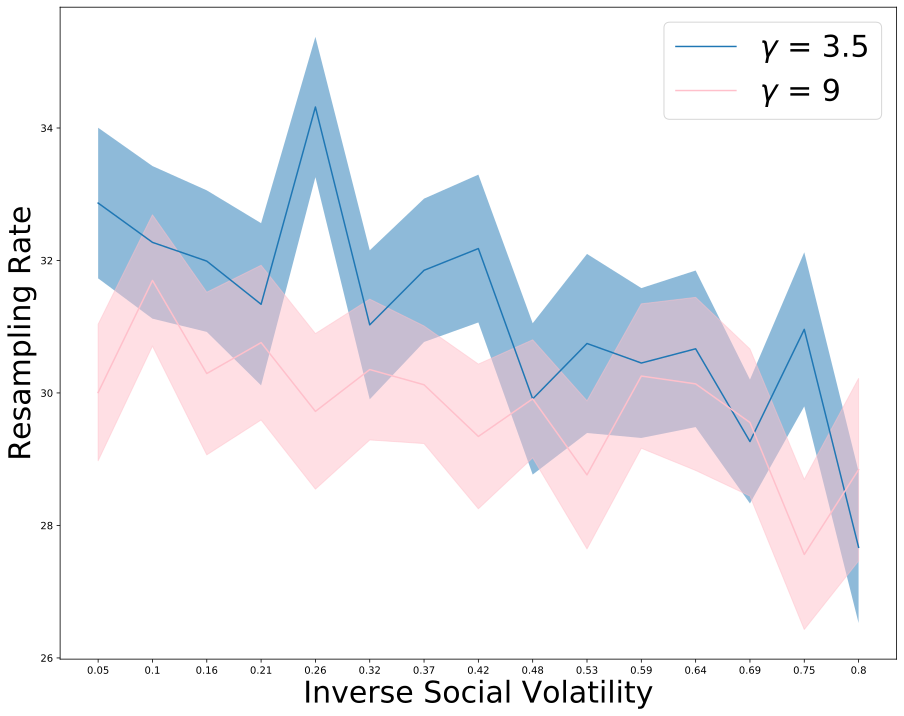

In [119]:
#plt.errorbar(range(15), ecb_b_db_clustering_hist[0,:], yerr = ecb_b_db_clustering_hist_std[0,:]**2, label = "ecb = 4.29")
#plt.errorbar(range(15), ecb_b_db_clustering_hist[-1,:], yerr = ecb_b_db_clustering_hist_std[-1,:]**2, label = "ecb = 9")
fig = plt.figure(figsize=(15,12))
yerr1 = ecb_b_db_clustering_hist_std[0,:]/3
yerr2 = ecb_b_db_clustering_hist_std[1,:]/3

plt.plot(range(15), ecb_b_db_clustering_hist[0,:], label = "$\gamma$" + " = 3.5")
plt.fill_between(range(15), ecb_b_db_clustering_hist[0,:]-yerr1, ecb_b_db_clustering_hist[0,:]+yerr1, alpha = 0.5)
plt.plot(range(15), ecb_b_db_clustering_hist[-1,:],  label = "$\gamma$" + " = 9",color = 'pink')
plt.fill_between(range(15), ecb_b_db_clustering_hist[-1,:]-yerr2, ecb_b_db_clustering_hist[-1,:]+yerr2, alpha = 0.5, color = 'pink')

plt.ylabel("Resampling Rate", fontsize = 30)
plt.xlabel("Inverse Social Volatility", fontsize = 30)
plt.xticks(np.arange(0,len(b_precision_gammas),1), labels = b_precision_gammas.round(2))
plt.legend(fontsize = 30)
plt.savefig("plot1")
plt.show()


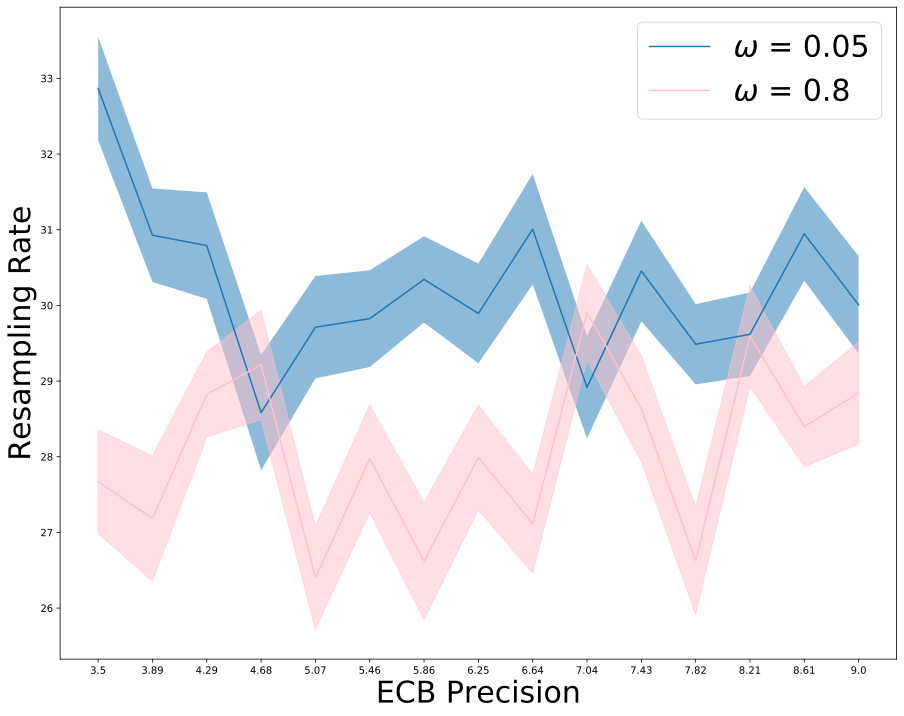

In [117]:
#plt.errorbar(range(15), ecb_b_db_clustering_hist[0,:], yerr = ecb_b_db_clustering_hist_std[0,:]**2, label = "ecb = 4.29")
#plt.errorbar(range(15), ecb_b_db_clustering_hist[-1,:], yerr = ecb_b_db_clustering_hist_std[-1,:]**2, label = "ecb = 9")
fig = plt.figure(figsize=(15,12))
yerr1 = ecb_b_db_clustering_hist_std[:,0]/5
yerr2 = ecb_b_db_clustering_hist_std[:,-1]/5

plt.plot(range(15), ecb_b_db_clustering_hist[:,0], label =  "$\omega$" + " = 0.05")
plt.fill_between(range(15), ecb_b_db_clustering_hist[:,0]-yerr1, ecb_b_db_clustering_hist[:,0]+yerr1, alpha = 0.5)
plt.plot(range(15), ecb_b_db_clustering_hist[:,-1],  label ="$\omega$" + " = 0.8", color = 'pink')
plt.fill_between(range(15), ecb_b_db_clustering_hist[:,-1]-yerr2, ecb_b_db_clustering_hist[:,-1]+yerr2, alpha = 0.5, color = 'pink')

plt.ylabel("Resampling Rate", fontsize = 30)
plt.xlabel("ECB Precision", fontsize = 30)
plt.xticks(np.arange(0,len(ecb_precision_gammas),1), labels = ecb_precision_gammas.round(2))
plt.legend(fontsize = 30)
plt.savefig("plot2")
plt.show()




In [116]:
b_precision_gammas

array([0.05      , 0.10357143, 0.15714286, 0.21071429, 0.26428571,
       0.31785714, 0.37142857, 0.425     , 0.47857143, 0.53214286,
       0.58571429, 0.63928571, 0.69285714, 0.74642857, 0.8       ])